   Age  Annual_salary_Lakhs       city service_type
0   50                 23.6  Hyderabad        cloud
1   36                 22.6  Bangalore        cloud
2   29                 12.3  Hyderabad       Devops
3   42                 17.6       Pune       Legacy
4   40                 18.8       Pune       Devops
              Age  Annual_salary_Lakhs
count  500.000000           500.000000
mean    41.322000            22.335600
std     11.051633             5.379358
min     22.000000             8.400000
25%     32.000000            18.475000
50%     43.000000            22.350000
75%     51.000000            26.325000
max     59.000000            35.100000
service_type     Devops     Legacy      cloud
city                                         
Bangalore     39.053254  21.301775  39.644970
Hyderabad     33.653846   0.000000  66.346154
Mumbai        38.053097  21.238938  40.707965
Pune          37.719298  32.456140  29.824561


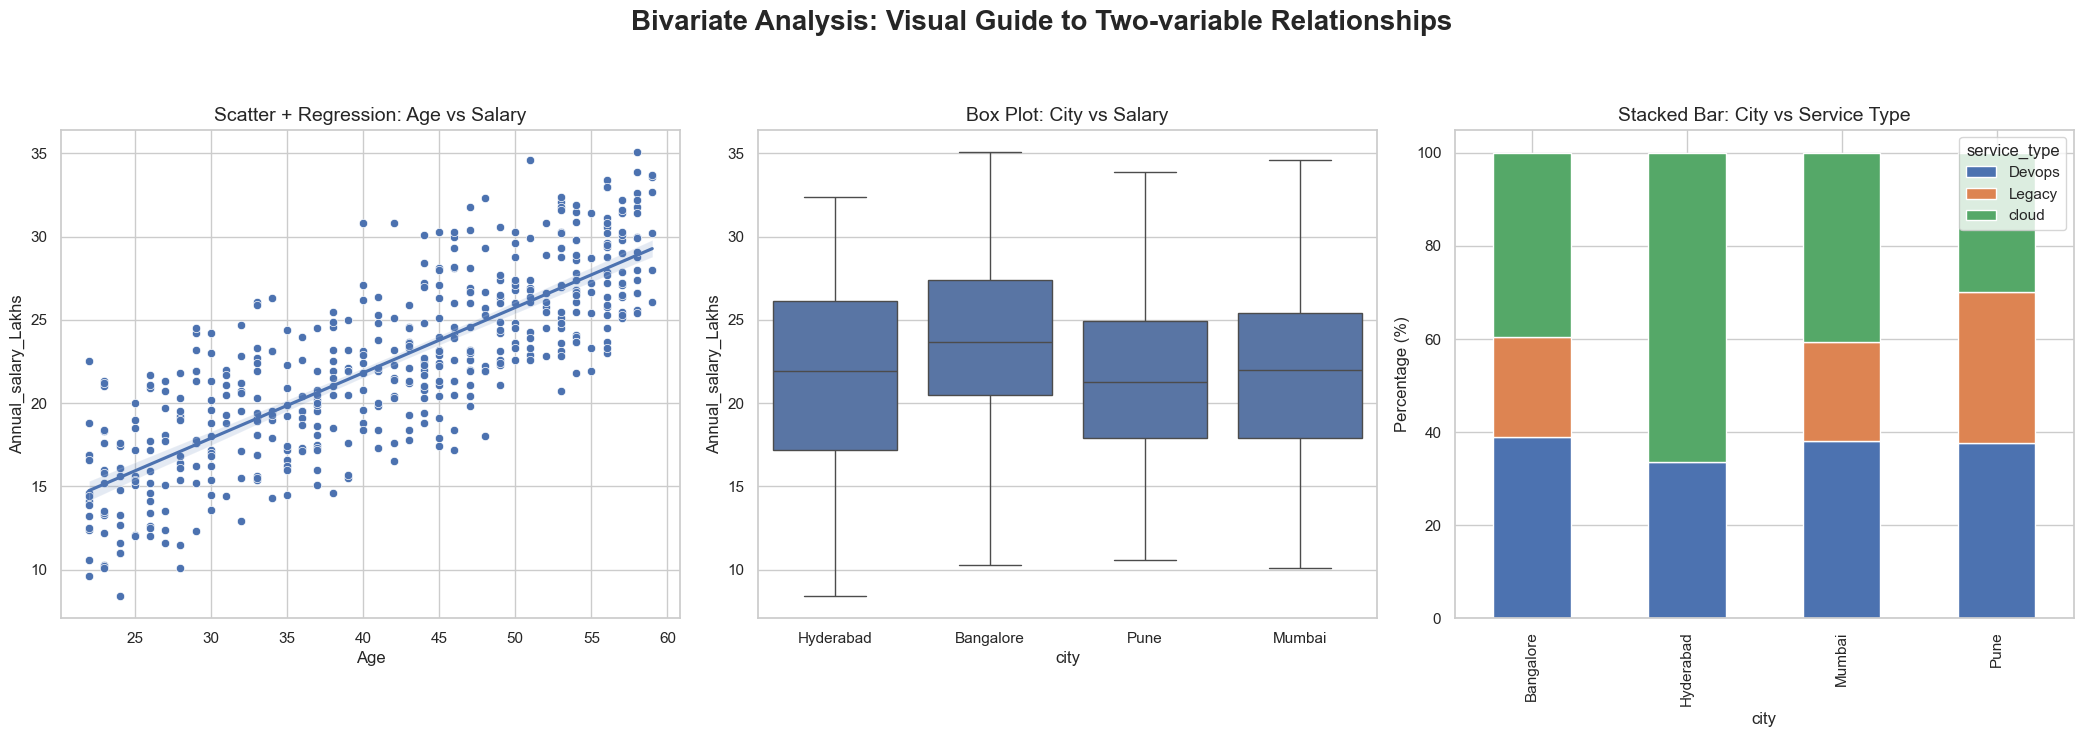

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ==============================
# Set Theme
# ==============================
sns.set_theme(style='whitegrid')

np.random.seed(42)
data_size = 500

# ==============================
# 1. Numerical Variable – Age
# ==============================
age = np.random.randint(22, 60, size=data_size)  # define age

# ==============================
# 2. Numerical Variable – Salary
# ==============================
salary = 5 + (age * 0.4) + np.random.normal(loc=0, scale=3, size=data_size)
salary = np.maximum(5, salary).round(1)

# ==============================
# 3. Categorical Variable – City
# ==============================
cities = np.random.choice(
    ['Bangalore','Mumbai','Pune','Hyderabad'],
    size=data_size,
    p=[0.35, 0.25, 0.2, 0.2]
)

# City-Based Salary Effect
salary[cities == 'Bangalore'] += 2.5

# ==============================
# 4. Categorical Variable – Service Type
# ==============================
service_types = np.random.choice(
    ['Devops','cloud','Legacy'],
    size=data_size,
    p=[0.4,0.35,0.25]
)

# Associate City with Service Type
service_types[cities == 'Hyderabad'] = np.random.choice(
    ['cloud','cloud','Devops'],
    size=(cities == 'Hyderabad').sum()
)

# ==============================
# 5. Create DataFrame
# ==============================
df = pd.DataFrame({
    'Age': age,
    'Annual_salary_Lakhs': salary,
    'city': cities,
    'service_type': service_types
})

print(df.head())
print(df.describe())

# ==============================
# 6. Bivariate Analysis Plots
# ==============================
fig, axes = plt.subplots(1, 3, figsize=(21, 7))
plt.suptitle(
    'Bivariate Analysis: Visual Guide to Two-variable Relationships',
    fontsize=20, fontweight='bold', y=1.05
)

# ==============================
# Plot 1 – Numerical vs Numerical (Scatter + Regression)
# ==============================
sns.scatterplot(x='Age', y='Annual_salary_Lakhs', data=df, ax=axes[0])
sns.regplot(x='Age', y='Annual_salary_Lakhs', data=df, scatter=False, ax=axes[0])
axes[0].set_title('Scatter + Regression: Age vs Salary', fontsize=14)

# ==============================
# Plot 2 – Numerical vs Categorical (Box Plot)
# ==============================
sns.boxplot(x='city', y='Annual_salary_Lakhs', data=df, ax=axes[1])
axes[1].set_title('Box Plot: City vs Salary', fontsize=14)

# ==============================
# Plot 3 – Categorical vs Categorical (Stacked Bar)
# ==============================
contingency_table = pd.crosstab(
    df['city'],
    df['service_type'],
    normalize='index'
) * 100

print(contingency_table)  # Optional: see table in console

contingency_table.plot(kind='bar', stacked=True, ax=axes[2])
axes[2].set_title('Stacked Bar: City vs Service Type', fontsize=14)
axes[2].set_ylabel('Percentage (%)')

# ==============================
# Final Layout
# ==============================
plt.tight_layout()
plt.show()
